### 로지스틱 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [7]:
samples = 1000
X, y = make_classification(
  n_samples=samples,
  n_features=2,
  n_informative=2,
  n_redundant=0,
  n_clusters_per_class=1)

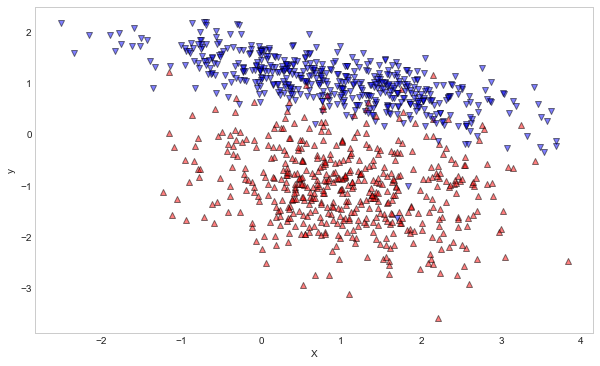

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] == 0:
    ax.scatter(X[i, 0], X[i, 1], edgecolors='k', alpha=0.5, marker='^', color='r')
  else:
    ax.scatter(X[i, 0], X[i, 1], edgecolors='k', alpha=0.5, marker='v', color='b')

plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
print(f'학습 데이터 점수: {model.score(X_train, y_train)}')
print(f'평가 데이터 점수: {model.score(X_test, y_test)}')

학습 데이터 점수: 0.97125
평가 데이터 점수: 0.95


In [11]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print(f'CV 평균 점수: {scores.mean()}')

CV 평균 점수: 0.967


In [12]:
model.intercept_, model.coef_

(array([-2.20148671]), array([[1.00824584, 4.65806109]]))

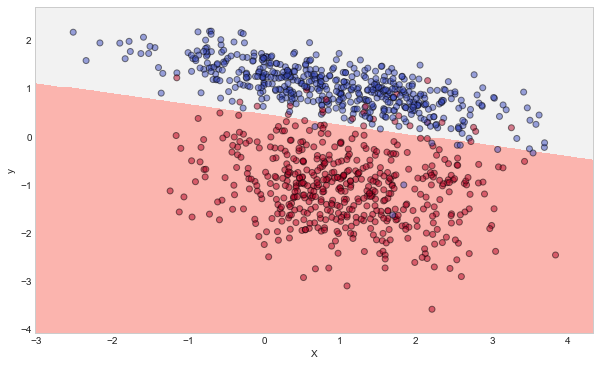

In [13]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c=np.abs(y-1), edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()


### 붓꽃 데이터

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

In [18]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Series(iris.target, dtype='category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [19]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

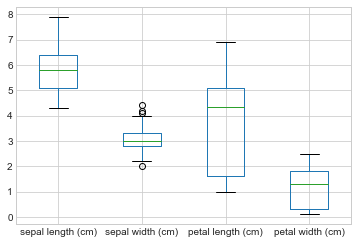

In [20]:
iris_df.boxplot()

<AxesSubplot:>

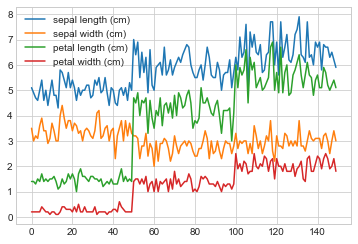

In [23]:
iris_df.plot()

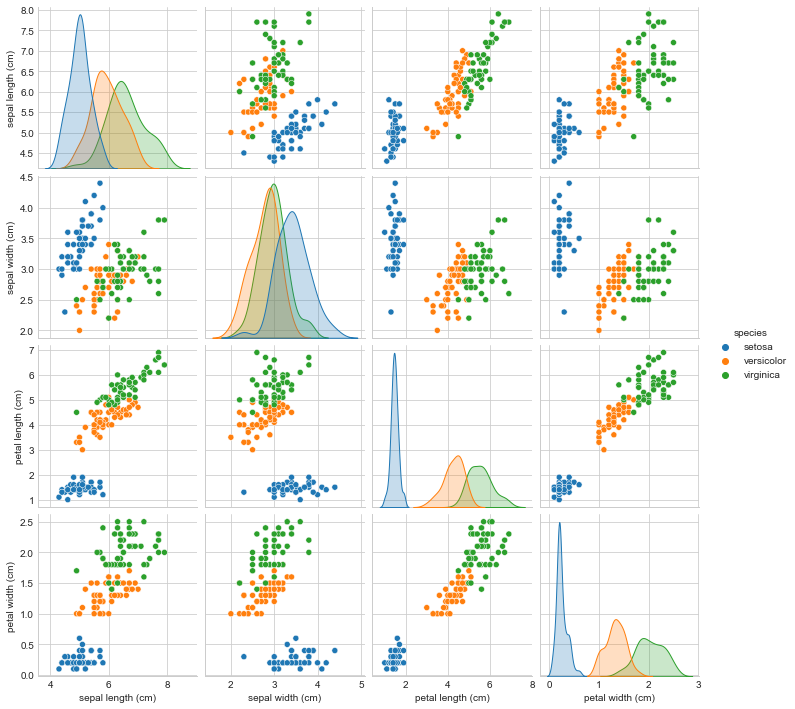

In [24]:
import seaborn as sns

sns.pairplot(iris_df, hue='species')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
  iris.data[:, [2, 3]],
  iris.target,
  test_size=0.2,
  random_state=0,
  stratify=iris.target)

In [26]:
model = LogisticRegression(
  C=100.0,
  random_state=0
)

model.fit(X_train, y_train)

print(f'학습 데이터 점수: {model.score(X_train, y_train)}')
print(f'평가 데이터 점수: {model.score(X_test, y_test)}')


학습 데이터 점수: 0.95
평가 데이터 점수: 1.0


In [27]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

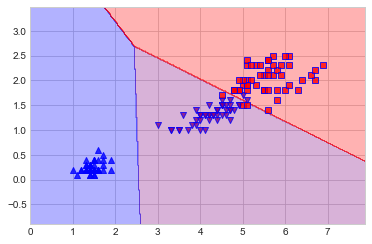

In [30]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

species = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
  plt.scatter(
    x=X[y==cl, 0],
    y=X[y==cl, 1],
    alpha=0.8,
    c=colors[idx],
    marker=markers[idx],
    label=species[idx],
    edgecolors='b'
  )

plt.show()


### 유방암 데이터

In [35]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [38]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


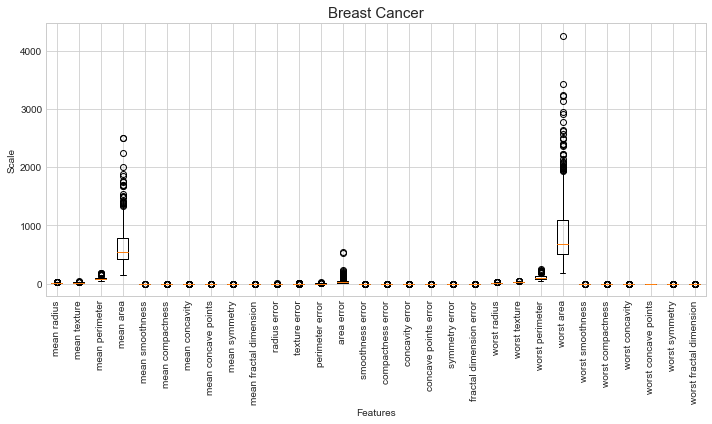

In [39]:
fig = plt.figure(figsize=[10, 6])
plt.title('Breast Cancer', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Scale')
plt.tight_layout()
plt.show()

In [42]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [43]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [44]:
print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'학습 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.9714285714285714
학습 데이터 점수 : 0.8947368421052632


### SGD

In [46]:
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(
  StandardScaler(),
  SGDClassifier(loss='log_loss'), # 로지스틱
)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log_loss'))])

In [47]:
print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'학습 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.9824175824175824
학습 데이터 점수 : 0.9210526315789473
